In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [3]:
train_data=pd.read_csv(r'train.csv')
test_data=pd.read_csv(r'test.csv')
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
for column  in train_data.columns:
  if train_data[column].dtype=="object":
    train_data[column].fillna(train_data[column].mode()[0],inplace=True)
    if column in test_data.columns:
      test_data[column].fillna(test_data[column].mode()[0],inplace=True)
  else:
    train_data[column].fillna(train_data[column].mean(),inplace=True)
    if column in test_data.columns:
      test_data[column].fillna(test_data[column].mean(),inplace=True)
      

C:\Users\MSI\AppData\Local\Temp\ipykernel_21668\3302162163.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mean(),inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_21668\3302162163.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [6]:
features=['GrLivArea','BedroomAbvGr','FullBath','HalfBath','TotRmsAbvGrd']
X=train_data[features]
y=train_data['SalePrice']

In [7]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_val,y_pred)
print("The mean absolute error is:",mae)
r2_sc=r2_score(y_test,y_pred)
print("The r2 score is:",r2_sc)
mean_sq_e=mean_squared_error(y_val,y_pred)
print("The mean squared error:",mean_sq_e)

The mean absolute error is: 36073.1387824548
The r2 score is: 0.6337670693441048
The mean squared error: 2809126045.9448586


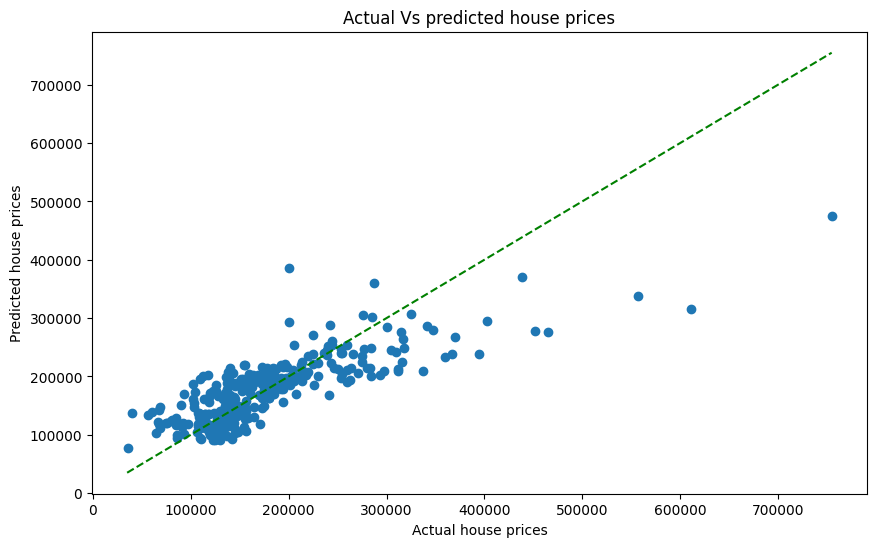

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(y_val,y_pred,alpha=0.5)
plt.xlabel("Actual house prices")
plt.ylabel("Predicted house prices")
plt.title("Actual Vs predicted house prices")
plt.plot([y.min(),y.max()],[y.min(),y.max()],'g--')
plt.show()

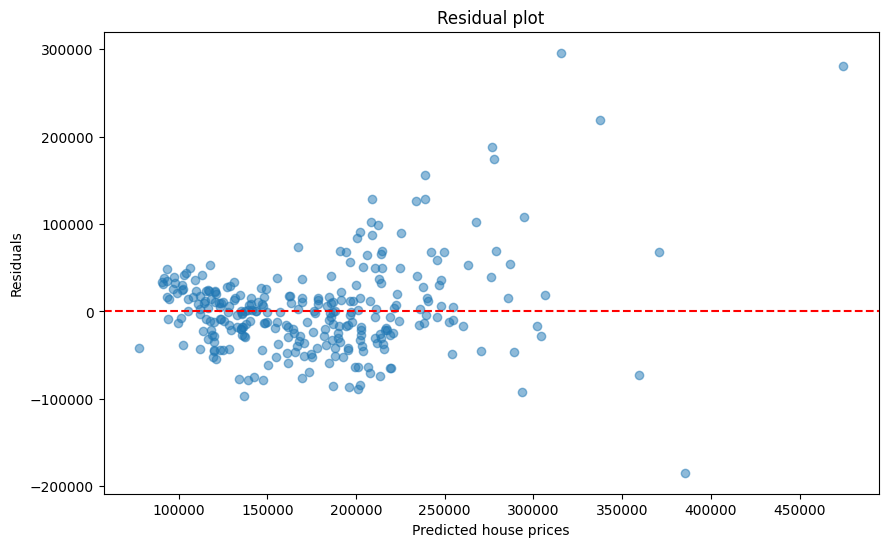

In [13]:
residual=y_test-y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residual,alpha=0.5)
plt.xlabel("Predicted house prices")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.axhline(y=0,color="r",linestyle="--")
plt.show()


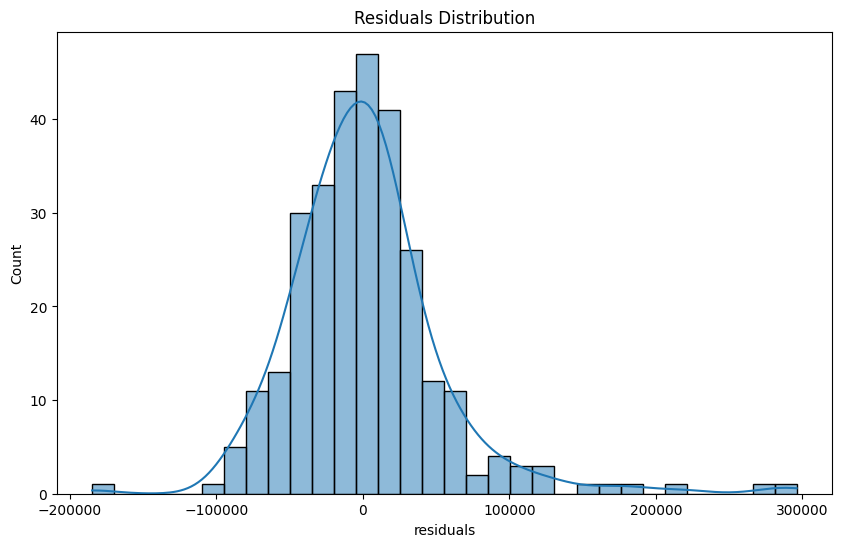

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(residual,kde=True)
plt.xlabel("residuals")
plt.title("Residuals Distribution")
plt.show()


<Figure size 1200x800 with 0 Axes>

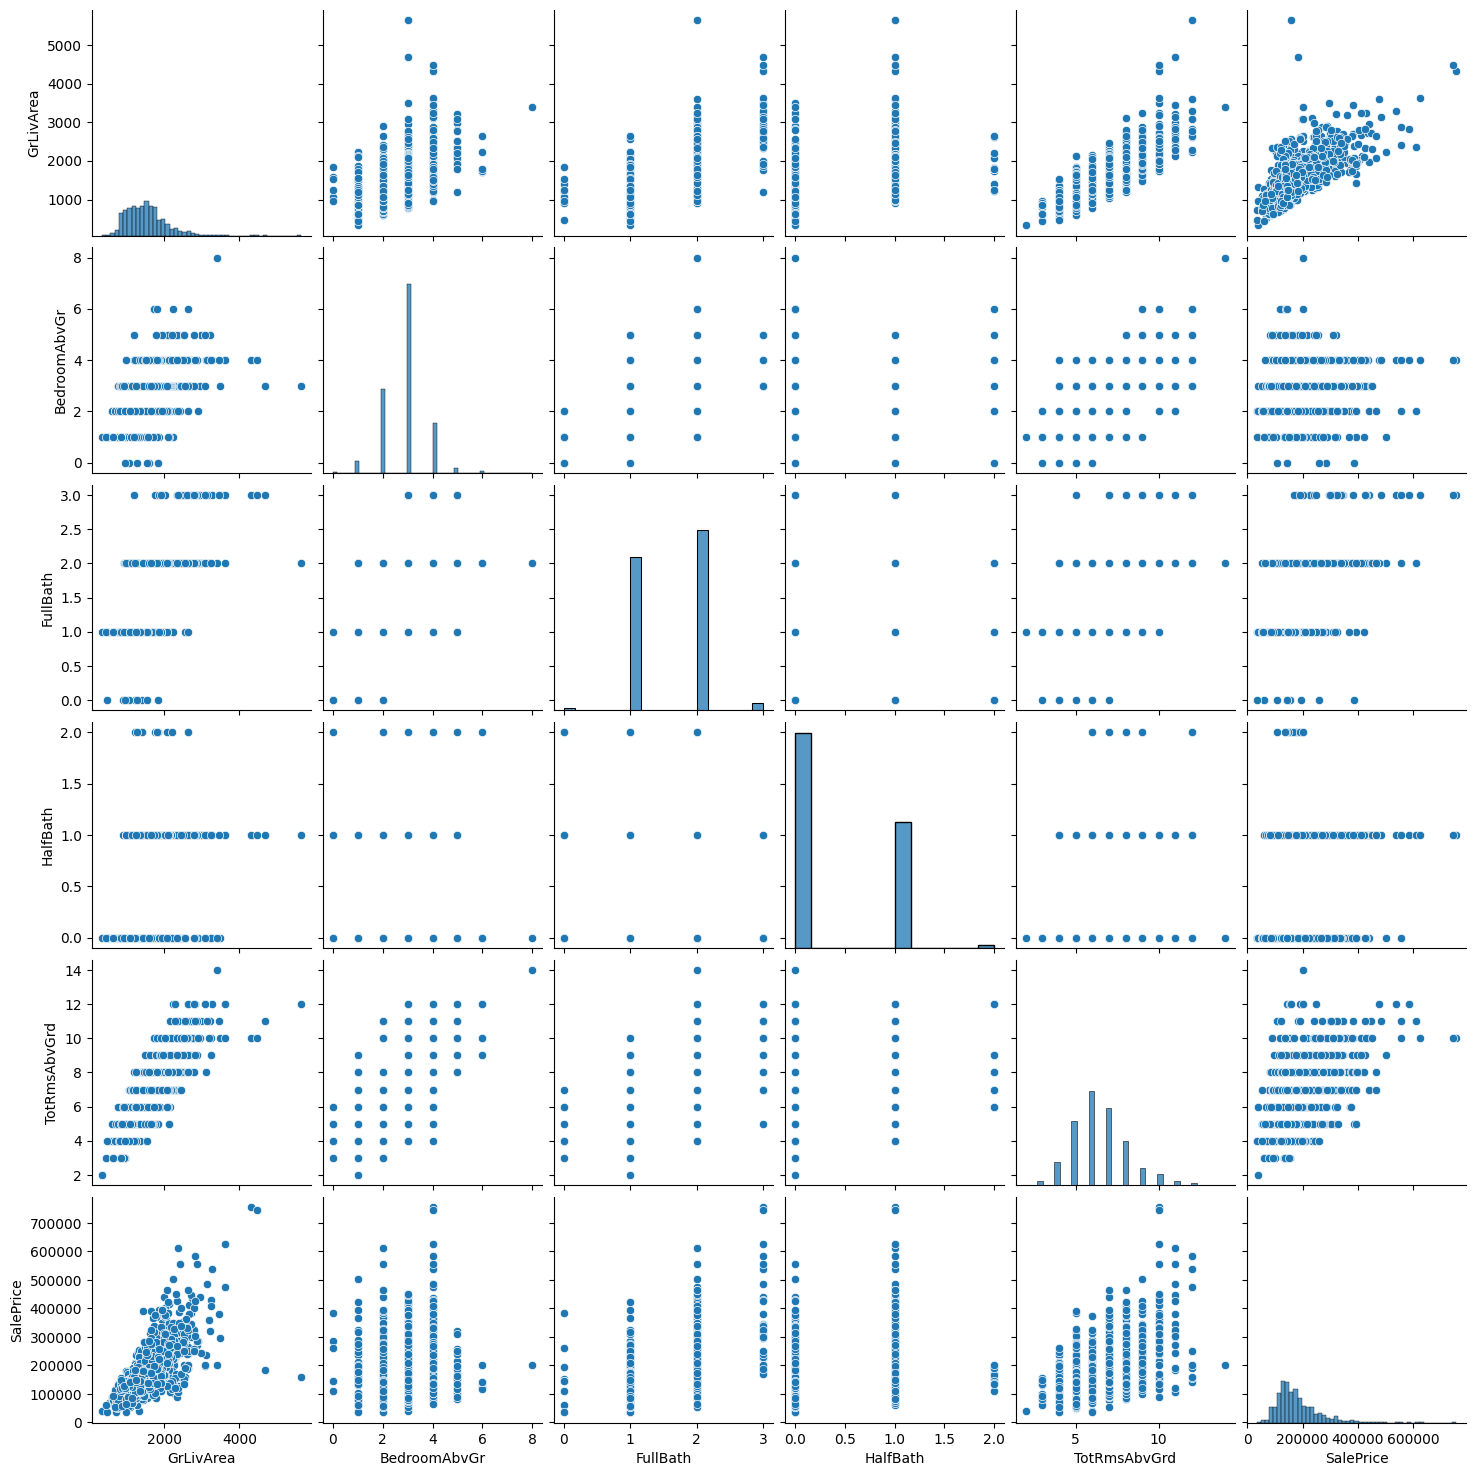

In [24]:
plt.figure(figsize=(12,8))
sns.pairplot(train_data[features+['SalePrice']])
plt.show()

In [26]:
example=pd.DataFrame({'GrLivArea':[2200],'BedroomAbvGr':[3],'FullBath':[3],'HalfBath':[1],'TotRmsAbvGrd':[7]})
exmp_pred=model.predict(example)
print(f'The predicted house price  is:${exmp_pred[0]:,.2f}')
#prepare the test_data and make predictions
X_test=test_data[features]
test_pred=model.predict(X_test)
#save prdictions
submission=pd.DataFrame({'Id':test_data['Id'],'SalePrice':test_pred})
submission.to_csv('submission_csv',index=False)


The predicted house price  is:$290,689.58
